# RandAugmenter Single Image Demo
 
##### Get the new sorted dataset [here](https://tumde-my.sharepoint.com/:f:/g/personal/gohdennis_tum_de/EmooVZ4vE95Iic-HIP9-P10BzX7oIOBmRhK8Q9tYzfJWRQ?e=maOqo5) [08_Aug_2022]

Annotations are stored under notebooks/preprocesing/restructured_w_original_labels.json (also in the .zip file)

Extract the zip under data/.


<hr style="height:2px;border-width:0;color:black;background-color:black">

This notebook will show the class working on a single image

In [43]:
import os,sys
from preprocessing.rand_augmenter import RandAugmenter
from pathlib import Path
from tensorflow.keras import preprocessing
import tensorflow as tf

Define parameters for RandAugmenter

In [44]:
op_list = [
    'AutoContrast', # problematic for 4D Tensors,but runs fine for single images [224 224 3]
    'Equalize', # problematic for 4D Tensors,but runs fine for single images [224 224 3]
    'Invert',
    'Rotate',
    'Posterize',
    'Solarize',
    'SolarizeAdd',
    'Color',
    'Brightness',
    'Sharpness',  # doesn't work with 4D Tensors yet! -> do not use for tf.Data.Dataset [32 224 224 3]
    'ShearX', # doesn't work with 4D Tensors yet! -> do not use for tf.Data.Dataset[32 224 224 3]
    'ShearY', # doesn't work with 4D Tensors yet! -> do not use for tf.Data.Dataset[32 224 224 3]
    'TranslateX',
    'TranslateY',
    'Cutout' # doesn't work with 4D Tensors yet! -> do not use for tf.Data.Dataset[32 224 224 3]
]
# They all run fine for single images with dims [x x 3]
N = 2 # number of sub-layers/sub-policies
M = 9 # strength of augmentation
ra = RandAugmenter(N, M, op_list)
ra.summary()

['AutoContrast', 'Equalize', 'Invert', 'Rotate', 'Posterize', 'Solarize', 'SolarizeAdd', 'Color', 'Brightness', 'Sharpness', 'ShearX', 'ShearY', 'TranslateX', 'TranslateY', 'Cutout']
2 layers with magnitude 9, with a total of 15 operations.


Let's pick an image from the dataset

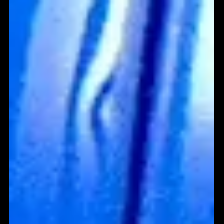

In [45]:
p = Path(os.getenv('DATA'), 'sort','dent','504006.png')

im= preprocessing.image.load_img(p)
arr = tf.keras.utils.img_to_array(im)
im = tf.image.resize_with_pad(arr,224,224)
preprocessing.image.array_to_img(im)


Set it to print its operation upon call

In [46]:
ra.set_verbose(True)

Run an image through the policy with N layers we defined previously

You should get a different result every time this is ran.

Equalize
Cutout


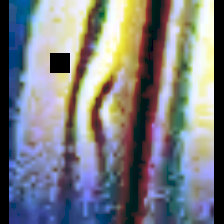

In [47]:
arr = tf.keras.utils.img_to_array(im)

new_im = ra.randaugment_transform(arr)
preprocessing.image.array_to_img(new_im)